# Mössbauer Spectroscopy Models in SpectraFit

This notebook demonstrates the use of the built-in Mössbauer spectroscopy models in SpectraFit. Mössbauer spectroscopy is a technique that provides information about chemical, structural, magnetic and electronic states of matter through the analysis of hyperfine interactions between electrons and nuclei.

SpectraFit includes four main Mössbauer models:

1. **Singlet** - For materials with no quadrupole splitting or magnetic hyperfine splitting
2. **Doublet** - For materials with quadrupole splitting but no magnetic hyperfine splitting
3. **Sextet** - For materials with magnetic hyperfine splitting (6 lines)
4. **Octet** - For materials with both magnetic hyperfine and quadrupole interactions (8 lines)

This notebook will demonstrate how to use each model, explain their parameters, and show how to fit experimental data.


In [1]:
# Import necessary libraries
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.gridspec import GridSpec

from spectrafit.models.moessbauer import moessbauer_doublet
from spectrafit.models.moessbauer import moessbauer_octet
from spectrafit.models.moessbauer import moessbauer_sextet

# Import SpectraFit models
from spectrafit.models.moessbauer import moessbauer_singlet

# For demonstration of fitting
from spectrafit.plugins import notebook as nb


# Define axis label constant
VELOCITY_LABEL = "Velocity (mm/s)"

# Import notebook plugin for solver approach

# Set plot style
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

## 1. Understanding Mössbauer Model Parameters

Before we start using the models, let's understand the key parameters in Mössbauer spectroscopy:

- **Isomer Shift (δ)**: Reflects the s-electron density at the nucleus and is sensitive to oxidation state and coordination chemistry.
- **Quadrupole Splitting (ΔEQ)**: Arises from the interaction between the nuclear quadrupole moment and the electric field gradient at the nucleus.
- **Magnetic Hyperfine Splitting**: Results from the interaction between the nucleus and a magnetic field, splitting spectral lines.
- **Line Width (FWHM)**: Natural line width plus instrumental broadening.
- **Background**: Constant background level in the spectrum.

These parameters provide critical information about the electronic structure, oxidation state, spin state, and local coordination environment of atoms in materials.


## 2. Create Velocity Scale for Mössbauer Models

Mössbauer spectra are typically plotted with velocity (mm/s) on the x-axis. Let's create a standard range for our demonstrations:


In [2]:
# Create a velocity scale in mm/s
velocity = np.linspace(-10, 10, 1000)  # Range -10 to 10 mm/s

## 3. Model 1: Mössbauer Singlet

A singlet is the simplest Mössbauer pattern, consisting of a single absorption peak. It occurs in materials with cubic crystal symmetry and no magnetic ordering, where there's only an isomer shift but no quadrupole or magnetic hyperfine splitting.

Examples: Fe metal at room temperature (though technically a very narrow, unresolved doublet).


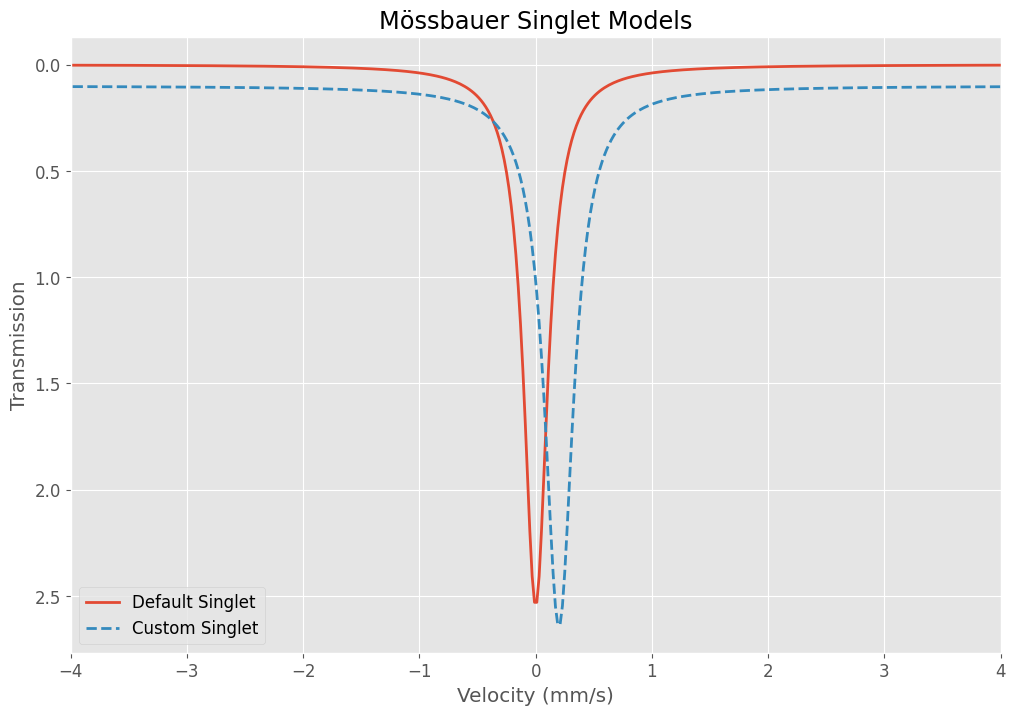

In [3]:
# Basic singlet with default parameters
singlet_default = moessbauer_singlet(velocity)

# Singlet with custom parameters
singlet_custom = moessbauer_singlet(
    velocity,
    isomer_shift=0.2,  # Isomer shift in mm/s
    fwhml=0.30,        # Line width
    amplitude=1.2,     # Amplitude
    background=0.1,     # Constant background
)

# Plot both singlets
plt.figure()
plt.plot(velocity, singlet_default, label="Default Singlet", linewidth=2)
plt.plot(velocity, singlet_custom, label="Custom Singlet", linewidth=2, linestyle="--")
plt.xlabel(VELOCITY_LABEL)
plt.ylabel("Transmission")
plt.title("Mössbauer Singlet Models")
plt.xlim(-4, 4)
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()  # Invert Y-axis as Mössbauer spectra typically show absorption downward
plt.show()

## 4. Model 2: Mössbauer Doublet

A doublet consists of two absorption peaks resulting from quadrupole splitting in the excited state of the nucleus. This occurs in non-cubic electronic environments where the electric field gradient is non-zero.

Examples: Fe²⁺ and Fe³⁺ compounds such as FeO, Fe₂O₃, ferrous/ferric salts, silicates, etc.


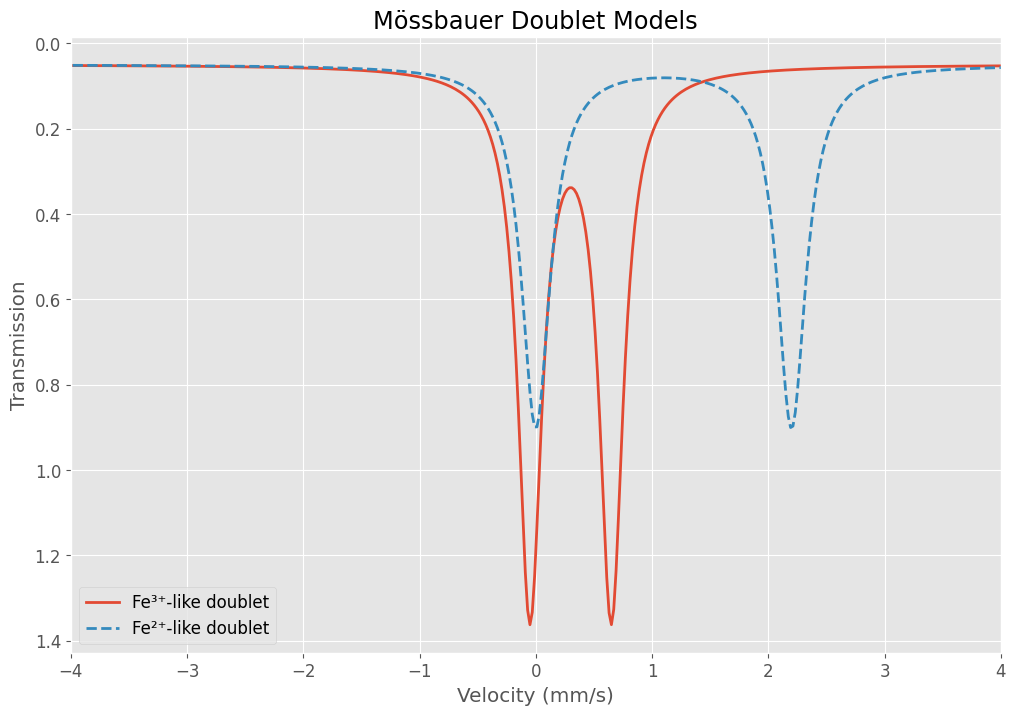

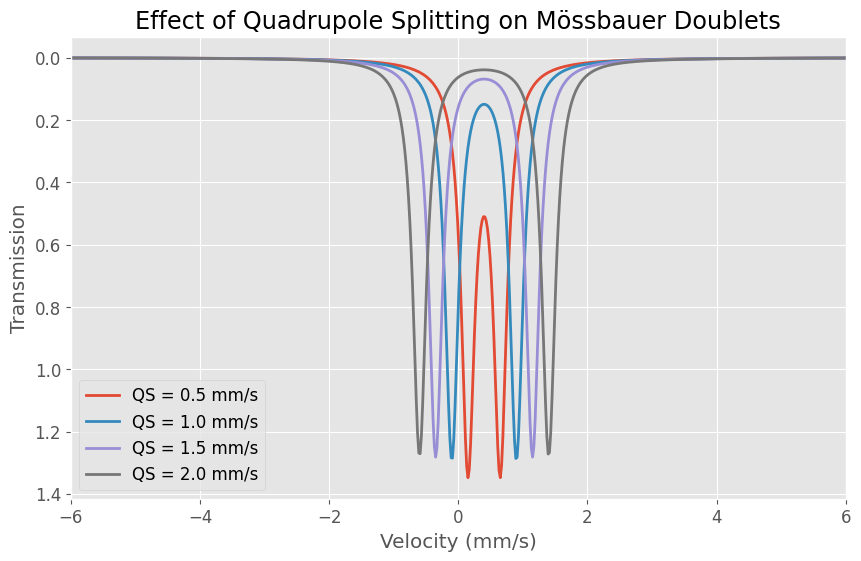

In [4]:
# Generate two doublet models with different parameters
doublet1 = moessbauer_doublet(
    velocity,
    isomer_shift=0.3,            # Typical for Fe³⁺ in oxides
    quadrupole_splitting=0.7,    # Moderate quadrupole splitting
    fwhml=0.25,                  # Line width
    amplitude=1.0,               # Amplitude
    background=0.05,              # Background
)

doublet2 = moessbauer_doublet(
    velocity,
    isomer_shift=1.1,            # Typical for Fe²⁺ in silicates
    quadrupole_splitting=2.2,    # Larger quadrupole splitting
    fwhml=0.30,                  # Line width
    amplitude=0.8,               # Amplitude
    background=0.05,              # Background
)

# Plot both doublets
plt.figure()
plt.plot(velocity, doublet1, label="Fe³⁺-like doublet", linewidth=2)
plt.plot(velocity, doublet2, label="Fe²⁺-like doublet", linewidth=2, linestyle="--")
plt.xlabel(VELOCITY_LABEL)
plt.ylabel("Transmission")
plt.title("Mössbauer Doublet Models")
plt.xlim(-4, 4)
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

# Visualize the effect of changing quadrupole splitting
plt.figure(figsize=(10, 6))
for qs in [0.5, 1.0, 1.5, 2.0]:
    doublet = moessbauer_doublet(
        velocity,
        isomer_shift=0.4,
        quadrupole_splitting=qs,
        fwhml=0.25,
        amplitude=1.0,
    )
    plt.plot(velocity, doublet, label=f"QS = {qs} mm/s", linewidth=2)

plt.xlabel(VELOCITY_LABEL)
plt.ylabel("Transmission")
plt.title("Effect of Quadrupole Splitting on Mössbauer Doublets")
plt.xlim(-6, 6)
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

## 5. Model 3: Mössbauer Sextet

A sextet shows six absorption peaks resulting from magnetic hyperfine splitting. This occurs in magnetically ordered materials where there is a significant magnetic field at the nucleus.

Examples: Ferromagnetic or antiferromagnetic materials like α-Fe (metallic iron), Fe₃O₄ (magnetite), α-Fe₂O₃ (hematite).


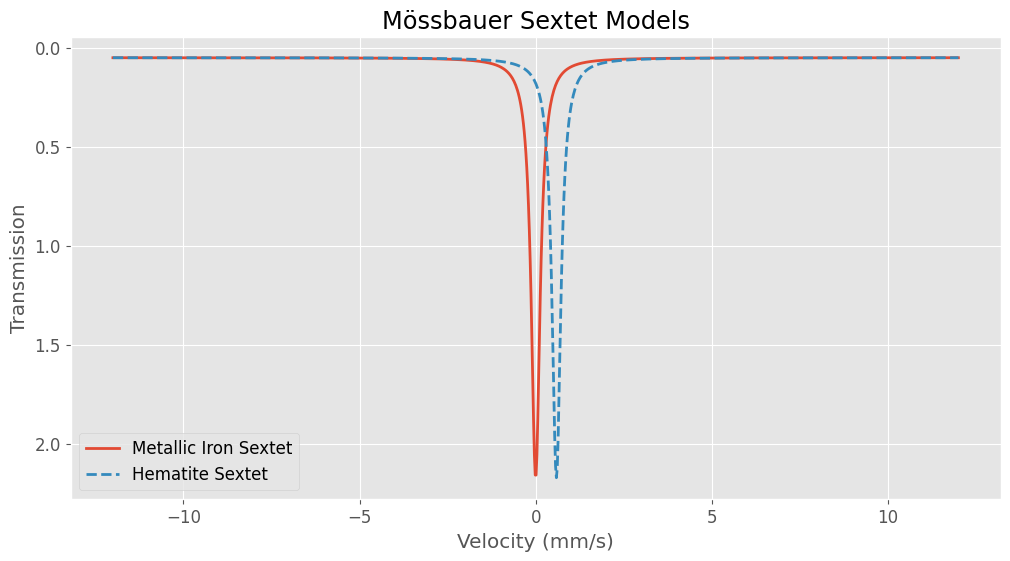

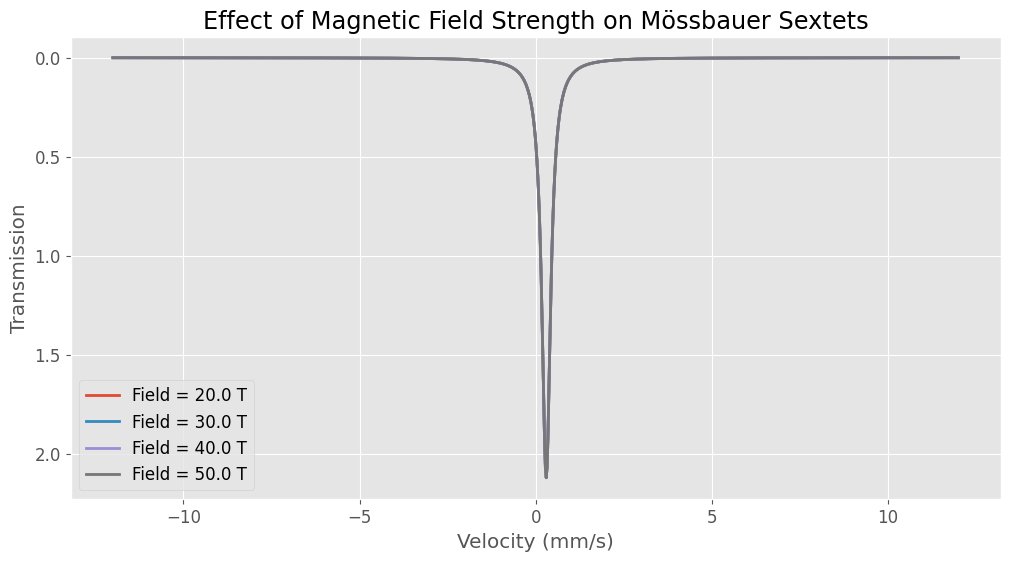

In [5]:
# Create a wider velocity scale for sextet
velocity_wide = np.linspace(-12, 12, 1000)

# Generate sextet patterns for different magnetic materials
sextet_iron = moessbauer_sextet(
    velocity_wide,
    isomer_shift=0.0,           # Metallic iron
    magnetic_field=33.0,        # ~33T for metallic iron at room temperature
    quadrupole_shift=0.0,       # No quadrupole effect in cubic structure
    fwhml=0.30,                 # Line width
    amplitude=1.0,              # Amplitude
    background=0.05,             # Background
)

sextet_hematite = moessbauer_sextet(
    velocity_wide,
    isomer_shift=0.38,          # Typical for Fe³⁺ in hematite
    magnetic_field=51.5,        # ~51.5T for hematite at room temperature
    quadrupole_shift=-0.21,     # Small quadrupole effect
    fwhml=0.30,                 # Line width
    amplitude=1.0,              # Amplitude
    background=0.05,             # Background
)

# Plot sextets
plt.figure(figsize=(12, 6))
plt.plot(velocity_wide, sextet_iron, label="Metallic Iron Sextet", linewidth=2)
plt.plot(velocity_wide, sextet_hematite, label="Hematite Sextet", linewidth=2, linestyle="--")
plt.xlabel(VELOCITY_LABEL)
plt.ylabel("Transmission")
plt.title("Mössbauer Sextet Models")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

# Visualize the effect of changing magnetic field strength
plt.figure(figsize=(12, 6))
for field in [20.0, 30.0, 40.0, 50.0]:
    sextet = moessbauer_sextet(
        velocity_wide,
        isomer_shift=0.3,
        magnetic_field=field,
        fwhml=0.30,
        amplitude=1.0,
    )
    plt.plot(velocity_wide, sextet, label=f"Field = {field} T", linewidth=2)

plt.xlabel(VELOCITY_LABEL)
plt.ylabel("Transmission")
plt.title("Effect of Magnetic Field Strength on Mössbauer Sextets")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

## 6. Model 4: Mössbauer Octet

An octet pattern occurs when both magnetic hyperfine interactions and quadrupole interactions are significant, leading to eight absorption lines. This is observed in materials with complex magnetic structures and non-cubic crystal environments.

Examples: Some complex iron oxides, iron-bearing minerals with distorted crystal structures, or materials with mixed valence states.


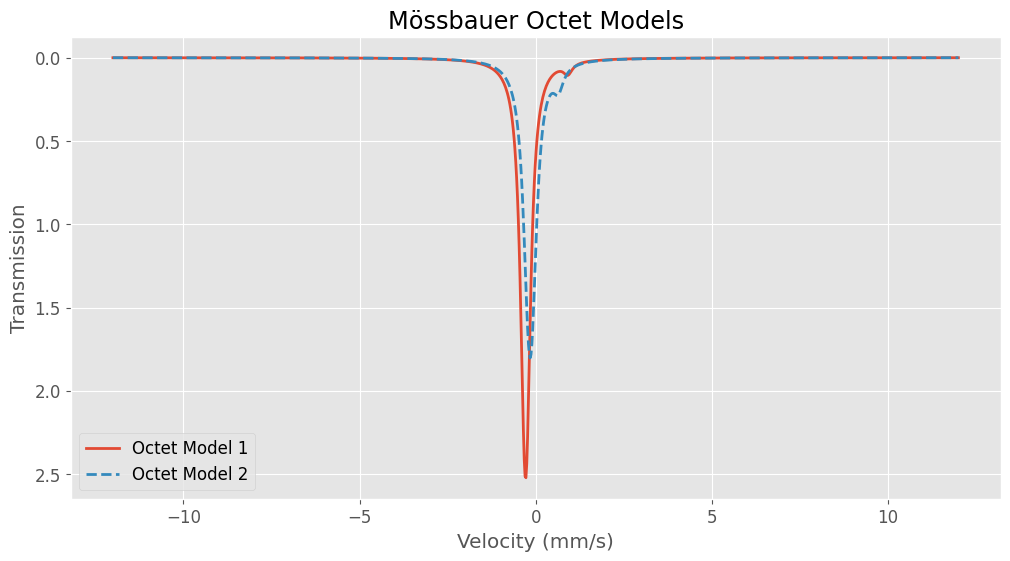

In [6]:
# Generate octet patterns
octet1 = moessbauer_octet(
    velocity_wide,
    isomer_shift=0.35,          # Fe³⁺-like isomer shift
    magnetic_field=45.0,        # Strong magnetic field
    quadrupole_shift=0.6,       # Significant quadrupole interaction
    efg_vzz=1.5e21,             # Electric field gradient parameter
    efg_eta=0.3,                # EFG asymmetry parameter
    fwhml=0.30,                 # Line width
    amplitude=1.0,              # Amplitude
    background=0.05,            # Background
    angle_theta_phi={"theta": 0.3, "phi": 0.2},  # Orientation angles
)

octet2 = moessbauer_octet(
    velocity_wide,
    isomer_shift=0.28,          # Different isomer shift
    magnetic_field=35.0,        # Different magnetic field
    quadrupole_shift=0.4,       # Different quadrupole shift
    efg_vzz=1.2e21,             # Different electric field gradient
    efg_eta=0.5,                # Different asymmetry
    fwhml=0.35,                 # Line width
    amplitude=0.9,              # Amplitude
    background=0.05,            # Background
    angle_theta_phi={"theta": 0.5, "phi": 0.1},  # Different orientation angles
)

# Plot octets
plt.figure(figsize=(12, 6))
plt.plot(velocity_wide, octet1, label="Octet Model 1", linewidth=2)
plt.plot(velocity_wide, octet2, label="Octet Model 2", linewidth=2, linestyle="--")
plt.xlabel(VELOCITY_LABEL)
plt.ylabel("Transmission")
plt.title("Mössbauer Octet Models")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

## 7. Comparison of All Mössbauer Models

Let's compare all four models side by side to see the progression in complexity:


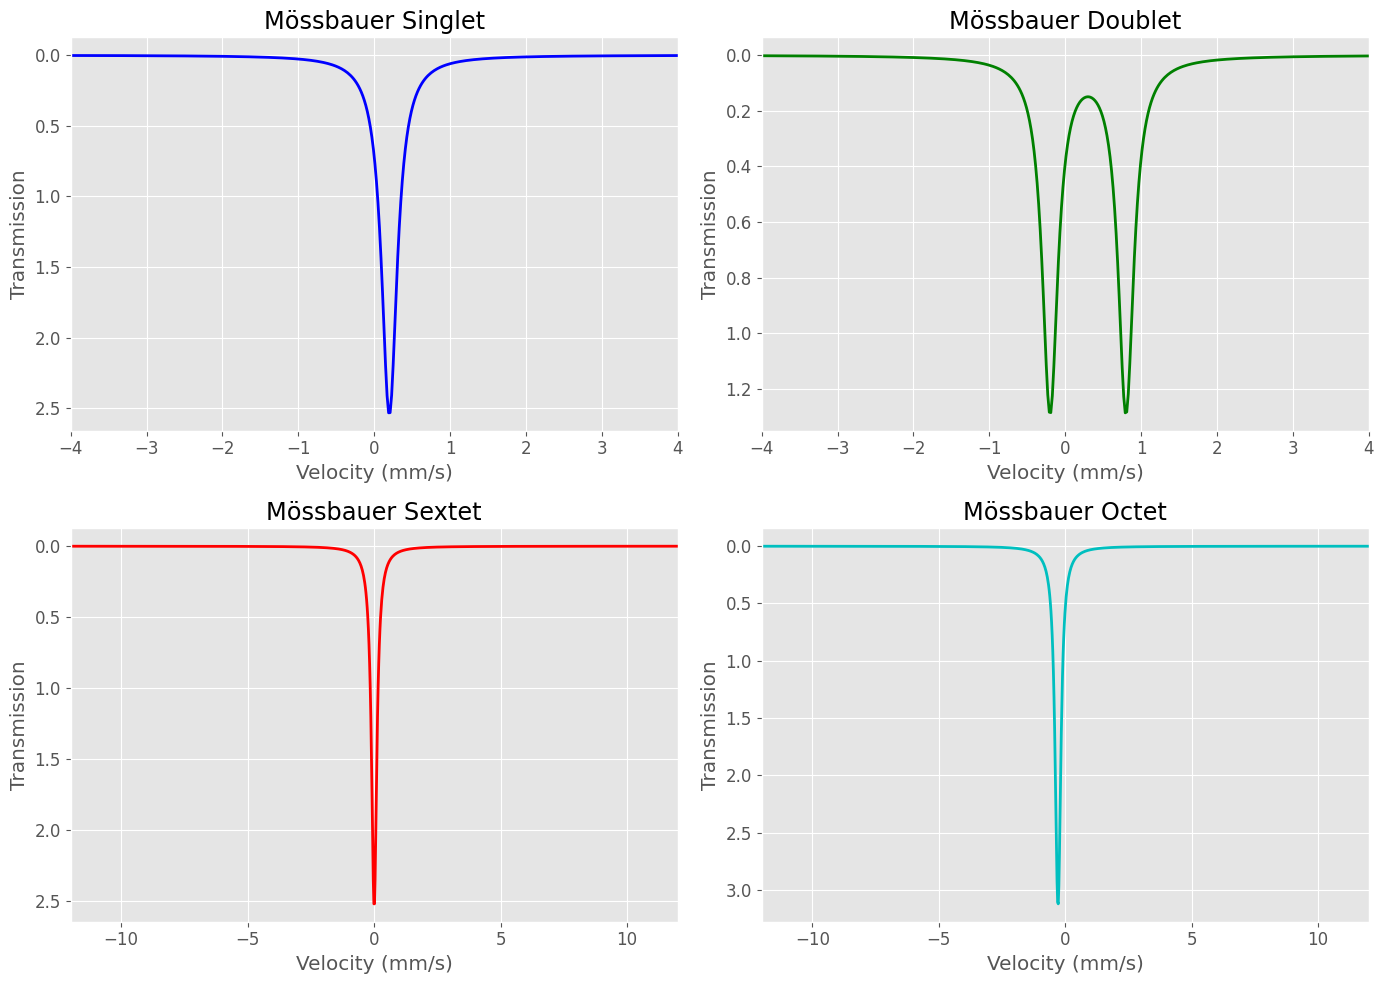

In [7]:
# Create a figure with 2x2 grid for all models
fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, figure=fig)

# Singlet plot
ax1 = fig.add_subplot(gs[0, 0])
singlet = moessbauer_singlet(velocity, isomer_shift=0.2, fwhml=0.25, amplitude=1.0)
ax1.plot(velocity, singlet, "b-", linewidth=2)
ax1.set_title("Mössbauer Singlet")
ax1.set_xlabel(VELOCITY_LABEL)
ax1.set_ylabel("Transmission")
ax1.set_xlim(-4, 4)
ax1.invert_yaxis()
ax1.grid(True)

# Doublet plot
ax2 = fig.add_subplot(gs[0, 1])
doublet = moessbauer_doublet(velocity, isomer_shift=0.3, quadrupole_splitting=1.0, fwhml=0.25, amplitude=1.0)
ax2.plot(velocity, doublet, "g-", linewidth=2)
ax2.set_title("Mössbauer Doublet")
ax2.set_xlabel(VELOCITY_LABEL)
ax2.set_ylabel("Transmission")
ax2.set_xlim(-4, 4)
ax2.invert_yaxis()
ax2.grid(True)

# Sextet plot
ax3 = fig.add_subplot(gs[1, 0])
sextet = moessbauer_sextet(velocity_wide, isomer_shift=0.0, magnetic_field=33.0, fwhml=0.25, amplitude=1.0)
ax3.plot(velocity_wide, sextet, "r-", linewidth=2)
ax3.set_title("Mössbauer Sextet")
ax3.set_xlabel(VELOCITY_LABEL)
ax3.set_ylabel("Transmission")
ax3.set_xlim(-12, 12)
ax3.invert_yaxis()
ax3.grid(True)

# Octet plot
ax4 = fig.add_subplot(gs[1, 1])
octet = moessbauer_octet(
    velocity_wide, isomer_shift=0.35, magnetic_field=45.0, quadrupole_shift=0.6,
    efg_vzz=1.5e21, efg_eta=0.3, fwhml=0.25, amplitude=1.0,
)
ax4.plot(velocity_wide, octet, "c-", linewidth=2)
ax4.set_title("Mössbauer Octet")
ax4.set_xlabel(VELOCITY_LABEL)
ax4.set_ylabel("Transmission")
ax4.set_xlim(-12, 12)
ax4.invert_yaxis()
ax4.grid(True)

plt.tight_layout()
plt.show()

## 8. Simulating Complex Mössbauer Spectra with Multiple Components

Real Mössbauer spectra often contain multiple components from different iron sites or different iron-bearing phases. Let's simulate a complex spectrum containing multiple components:


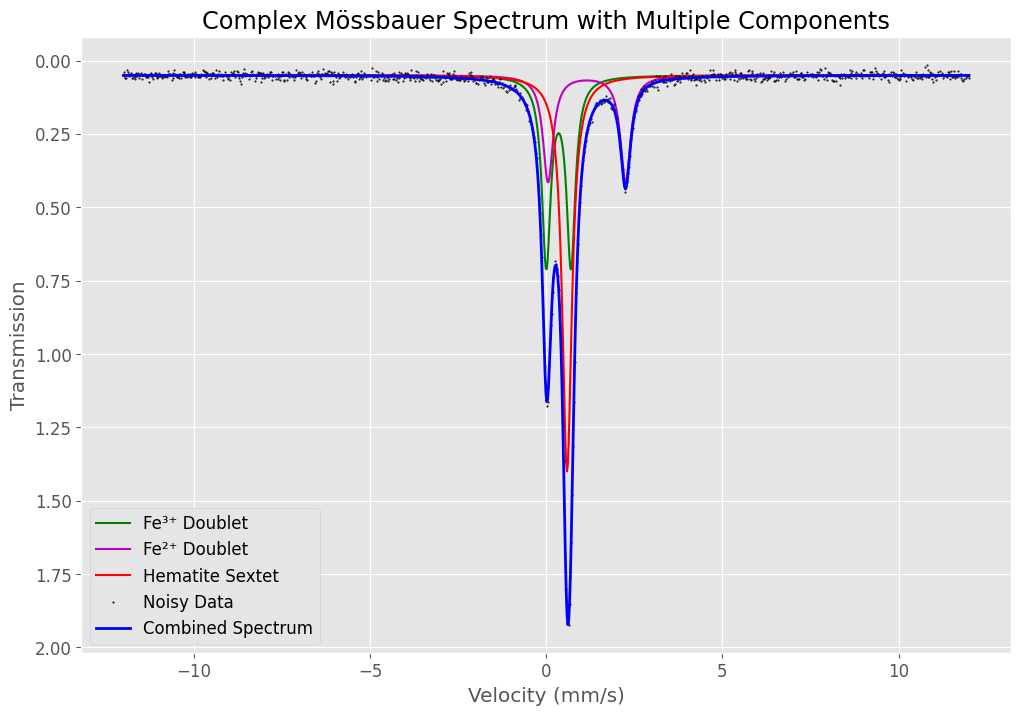

In [8]:
# Simulate a complex spectrum with multiple components
velocity_complex = np.linspace(-12, 12, 1000)

# Component 1: Fe3+ doublet (e.g., from a silicate mineral)
fe3_doublet = moessbauer_doublet(
    velocity_complex,
    isomer_shift=0.35,
    quadrupole_splitting=0.7,
    fwhml=0.30,
    amplitude=0.6,
    background=0.0,
)

# Component 2: Fe2+ doublet (e.g., from another mineral phase)
fe2_doublet = moessbauer_doublet(
    velocity_complex,
    isomer_shift=1.15,
    quadrupole_splitting=2.2,
    fwhml=0.35,
    amplitude=0.4,
    background=0.0,
)

# Component 3: Magnetic sextet (e.g., from hematite)
hematite_sextet = moessbauer_sextet(
    velocity_complex,
    isomer_shift=0.38,
    magnetic_field=51.5,
    quadrupole_shift=-0.21,
    fwhml=0.33,
    amplitude=0.7,
    background=0.0,
)

# Add a constant background
background = np.ones_like(velocity_complex) * 0.05

# Combine all components
complex_spectrum = fe3_doublet + fe2_doublet + hematite_sextet + background

# Add some noise to simulate experimental data
rng = np.random.default_rng(42)  # For reproducibility
noise = rng.normal(0, 0.01, velocity_complex.shape)
noisy_spectrum = complex_spectrum + noise

# Plot the complex spectrum and its components
plt.figure(figsize=(12, 8))

# Plot individual components
plt.plot(velocity_complex, fe3_doublet + 0.05, "g-", linewidth=1.5, label="Fe³⁺ Doublet")
plt.plot(velocity_complex, fe2_doublet + 0.05, "m-", linewidth=1.5, label="Fe²⁺ Doublet")
plt.plot(velocity_complex, hematite_sextet + 0.05, "r-", linewidth=1.5, label="Hematite Sextet")

# Plot the combined spectrum
plt.plot(velocity_complex, noisy_spectrum, "k.", markersize=1, label="Noisy Data")
plt.plot(velocity_complex, complex_spectrum, "b-", linewidth=2, label="Combined Spectrum")

plt.xlabel(VELOCITY_LABEL)
plt.ylabel("Transmission")
plt.title("Complex Mössbauer Spectrum with Multiple Components")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

## 9. Fitting a Mössbauer Spectrum Using SpectraFit

Now let's demonstrate how to fit a Mössbauer spectrum using the SpectraFit framework. We'll use the simulated data from the previous section as our "experimental" data.


In [9]:
# Prepare the data for fitting


x_data = velocity_complex
y_data = noisy_spectrum

# Convert to DataFrame for SpectraFit notebook plugin
moessbauer_data = pd.DataFrame({
    "Velocity": x_data,  # mm/s
    "Transmission": y_data,
})

# Initialize the SpectraFitNotebook with our Mössbauer data
spn = nb.SpectraFitNotebook(
    df=moessbauer_data,
    x_column="Velocity",
    y_column="Transmission",
    fname="moessbauer_example",
)

# Define initial model for fitting using the solver_model approach
initial_model = [


    # Component 1: Fe³⁺ doublet
    {
        "moessbauerdoublet": {
            "amplitude": {"value": 0.5, "min": 0.0, "max": 1.0, "vary": True},
            "isomershift": {"value": 0.3, "min": 0.0, "max": 0.7, "vary": True},
            "quadrupolesplitting": {"value": 0.6, "min": 0.3, "max": 1.0, "vary": True},
            "fwhml": {"value": 0.3, "min": 0.2, "max": 0.4, "vary": True},
            "center": {"value": 0.0, "min": -0.2, "max": 0.2, "vary": True},
        },
    },
    # Component 2: Fe²⁺ doublet
    {
        "moessbauerdoublet": {
            "amplitude": {"value": 0.3, "min": 0.0, "max": 1.0, "vary": True},
            "isomershift": {"value": 1.0, "min": 0.8, "max": 1.3, "vary": True},
            "quadrupolesplitting": {"value": 2.0, "min": 1.5, "max": 2.5, "vary": True},
            "fwhml": {"value": 0.3, "min": 0.2, "max": 0.5, "vary": True},
            "center": {"value": 0.0, "min": -0.2, "max": 0.2, "vary": True},
        },
    },
    # # Component 3: Hematite sextet
    {
        "moessbauersextet": {
            "amplitude": {"value": 0.6, "min": 0.3, "max": 1.0, "vary": True},
            "isomershift": {"value": 0.4, "min": 0.2, "max": 0.6, "vary": True},
            "magneticfield": {"value": 50.0, "min": 45.0, "max": 55.0, "vary": True},
            "quadrupoleshift": {"value": -0.2, "min": -0.4, "max": 0.0, "vary": True},
            "fwhml": {"value": 0.3, "min": 0.2, "max": 0.5, "vary": True},
            "center": {"value": 0.0, "min": -0.2, "max": 0.2, "vary": True},
        },
    },
]

# Define optimizer and minimizer settings (similar to what was in the parameters dictionary)
optimizer_settings = {
    "max_nfev": 1000,
    "method": "leastsq",
}

minimizer_settings = {
    "nan_policy": "propagate",
    "calc_covar": True,
}

# Run the fit using solver_model approach
spn.solver_model(
    initial_model=initial_model,
    show_peaks=True,  # Show individual peaks
# optimizer_kws=optimizer_settings,
# minimizer_kws=minimizer_settings,
    show_plot=True,  # Display the fit results?
)



/Users/hahn/LocalDocuments/GitHub_Forks/spectrafit/spectrafit/report.py:241: UserWarning:



## WARNING #########################
Uncertainties could not be estimated
####################################


/Users/hahn/LocalDocuments/GitHub_Forks/spectrafit/spectrafit/report.py:241: UserWarning:



## WARNING ########################################################################################
The parameter 'moessbauerdoublet_fwhml_2' is at its boundary and uncertainties cannot be estimated!
###################################################################################################


/Users/hahn/LocalDocuments/GitHub_Forks/spectrafit/spectrafit/report.py:241: UserWarning:



## WARNING ####################################################################################################
The parameter 'moessbauersextet_magneticfield_3' is at its initial value and uncertainties cannot be estimated!
##################################################################################

## 10. Conclusion

This notebook has demonstrated the Mössbauer spectroscopy models available in SpectraFit:

1. **Singlet** - For materials with no quadrupole or magnetic splitting
2. **Doublet** - For materials with quadrupole splitting
3. **Sextet** - For materials with magnetic hyperfine splitting
4. **Octet** - For materials with both magnetic and quadrupole interactions

These models can be used individually or combined to analyze complex Mössbauer spectra from various iron-bearing materials.

The key parameters that can be extracted from Mössbauer spectra include:

- Isomer shift (δ) - Related to oxidation state and coordination
- Quadrupole splitting (ΔEQ) - Related to site symmetry and valence state
- Magnetic hyperfine field (Bhf) - Related to magnetic ordering
- Line widths - Related to local environments and dynamics

SpectraFit provides a flexible framework for fitting these models to experimental data and extracting physically meaningful parameters. The `solver_model` approach from the notebook plugin offers a particularly streamlined workflow for efficient data analysis, parameter extraction, and result visualization.
